In [3]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

In [4]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import top_k_accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score

In [5]:

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
from itertools import combinations

In [7]:
import seaborn as sns
sns.set_style("whitegrid")

In [8]:
state = 'GA'

In [9]:
file_symptoms_train = '../comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_train__maxCorrected.fea'

noun_sentence_state_train = pd.read_feather(file_symptoms_train)

In [10]:
for col in noun_sentence_state_train.columns:
    print(col)

listingid
qtr
cbsa_div
cbsa
state
Transdate
Transprice
cj_living_area
fips_code
census_tract
zip
ListingPrice
avmValue
avmerror
AVM_Error_List
Listing_Error_List
AVM_Error_Indicators_0
AVM_Error_Indicators_1
AVM_Error_Indicators_2
AVM_Error_Indicators_3
AVM_Error_Indicators_4
AVM_Error_Indicators_5
AVM_Error_Indicators_6
AVM_Error_Indicators_7
AVM_Error_Indicators_8
AVM_Error_Indicators_9
AVM_Error_Indicators_10
AVM_Error_Indicators_11
AVM_Error_Indicators_scale
AVM_Error_Indicators_scale_inverse
Listing_Error_Indicators_0
Listing_Error_Indicators_1
Listing_Error_Indicators_2
Listing_Error_Indicators_3
Listing_Error_Indicators_4
Listing_Error_Indicators_5
Listing_Error_Indicators_6
Listing_Error_Indicators_7
Listing_Error_Indicators_8
Listing_Error_Indicators_9
Listing_Error_Indicators_10
Listing_Error_Indicators_11
transaction_year
AVM_Error_Indicators_0_max_value
AVM_Error_Indicators_0_min_value
AVM_Error_Indicators_0_max_indicator
AVM_Error_Indicators_0_min_indicator
AVM_Error_Indic

area hardwood floors
new look
great price
chimneys farm
separate whirlpool tub shower
primary suite
new hardiplank
beautiful clubhouse
new appliances
beautiful wrap
expansive views
main level owners suite
lots amenities
popcorn ceilings
must see home
lovely custom
brick estate
complete renovation
corporate relocation
hardwood entry
crepe myrtles
stair rails
convenient bedrooms
total privacy
personal touch
new front door
serene views
interior finishes
current home
owners suite w
golden opportunity
agent view
value area
outdoor spaces
additional acreage
easy access parks
family fun
hardwoods galore
designer touches
new lvt
yard plenty room
oakhurst village
easy freeway access
sound system
hall location
big game
acre home site
custom moldings
luxurious baths
morning coffee front porch
new hardwoods
new liner
brick accent wall
island lots counter space kitchen
new hardy plank
breakfast area view family room
lakeside high school district
wood ceilings
steps grant park
public schools
interio

separate family
porch addition
white oak golf course
new vinyl plank
plant shutters
pride ownership shows
double lot
frank lloyd wright
2car gar
family room wet
patio overlooks level
large trees
location cant
schedule visit
utility bills
new septic system
cost use
study area
upper level hosts
kitchen wcherry cabinets
spiral staircase
original details
two story family room fireplace
desirable master
separate tub shower double vanity
porches front
popular swimming tennis neighborhood
extra features
built in china cabinet
quiet retreat
beds 
great starter
sub zero
custom paint
house lot
owners suites
membership fees
floor coverings
yard creek
separate shower glass surround
ponce city market
separate media room
plenty room pool
hall bath
open concept kitchen
extra crown
huge bonus
luxury master suite
room roam
doors lead
electric utilities
heart pooler
cobb location
fault seller
open loft
lot storage
perfect neighborhood
complete stainless appliances
seller offering
splash kitchen
short bi

new k8 school
formal banquet
real living
huge master suite
sun porch
city schools
room sunroom
upstairs main level
private guest suite
room relax
master ensuite
hard days work
private peaceful
loss gain
teen in law suite
open porch
terrace level media room
bay window breakfast area
minutes i75
spacious terrace level
kitchen with double ovens
dinner parties
family room w brick fireplace
3br2ba home
wfrench doors
wood paneling
large laundry room utility
full basement
stone exterior
chair railing
additional storage
available community
ton hvac
separate dinning room
show home
public records
2 acres
popular area
double vanity garden tub
quiet enjoyment
new heat pump
hardcoat stucco
rear property
hard surface floors
lake lanier
swimtennisgolf community
bedrooms bonus room
huge sun room
recent years
home move in
top school district
beautiful parks
affordable price
premium corner lot
immaculate brick
spacious pantry
master suite spa bath
ready immediate occupancy
handicap access
transom window

cozy fireside
forsyth location
spacious media room
executive style home
doors deck
chain link
fabulous backyard
automatic door
perfect price
heart roswell
main road
brick custom
built in microwave
loftmedia room
cabinet hardware
roof approximate
master suite w
large spa
homeowner association fees
peachtree hills
chefs kit
popular neighborhoods
additional loft
sagamore hills
new kitchen counters
excellent location
house overlooks
great room w
ceilings master bedroom
tall crawl space
amazing sunroom
brkfst room
complete space
amazing privacy
tree line
gourmet kitchen double ovens
additional lot
separate his hers vanities
plenty privacy
city decatur schools
spacious bonus room
lot size
tribble mill park
perfect media room
secondary kitchen
basement game room
storage barn
distance beach
additional details
deck privacy
spacious custom
old roof
intercom system
large secondary bedrooms walkin closets
storage building
open light
backyard gazebo
owner home
great cookouts
full guest bath
gorgeou

family room, main level
family room, new granite counter tops
family room, new hardwood floors
family room, new stainless steel appliances
family room, separate shower
fresh paint, new carpets
fresh paint, new granite counter tops
fresh paint, new hardwood floors
fresh paint, new roof
fresh paint, new stainless steel appliances
front porch, new stainless steel appliances
full bath home, full baths
full bath home, great room
full bath home, guest bedrooms
full bath home, large bedroom
full bath home, large closet
full bath home, laundry room
full bath home, main floor
full bath home, main level
full bath home, master bath
full bath home, master bedroom
full bath home, master suite w
full bath home, natural light
full bath home, new carpets
full bath home, new granite counter tops
full bath home, new hardwood floors
full bath home, new roof
full bath home, new stainless steel appliances
full bath home, open concept floor plan
full bath home, private yard
full bath home, secondary bedroom

In [11]:
file_symptoms_test = '../comments/raw_comments/agent_comments_'+state+\
                        '_filtered_final_joined_selected_columns_use_max_scale_one_df_test__maxCorrected.fea'
noun_sentence_state_test = pd.read_feather(file_symptoms_test)


In [12]:
file_ = '../comments/raw_comments/agent_comments_'+state+\
                        '_noun_sentence_df_final_reindex_df_filtered.fea'
noun_sentence_df_final_reindex_df_filtered = pd.read_feather(file_)

In [13]:
noun_sentence_df_final_reindex_df_filtered

,level_0,index,AVM_Error_List,Listing_Error_List,Listingid_List,AVM_Error_Indicators_0,AVM_Error_Indicators_1,AVM_Error_Indicators_2,AVM_Error_Indicators_3,AVM_Error_Indicators_4,...,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11,AVM_Error_List_count,Listing_Error_List_count,Listingid_List_count,AVM_Error_Indicators_scale,AVM_Error_Indicators_scale_inverse
0,5895,seller chooses attorney,"[0.06298180555555555, -0.07527600000000012, -0...","[0.02847222222222222, -0.2153846153846154, -0....","[77911179, 180510904, 189586243, 77958589, 854...",-0.483720,0.156418,0.070260,-0.699504,-1.030980,...,0.070632,0.153714,77,44.155844,48.051948,77,77,77,0.817615,1.223069
1,522,omission and or,"[0.4479667188315075, 0.39755113043478263, -0.0...","[0.0, -0.020217391304347826, -0.00231481481481...","[200890959, 212474411, 216781018, 4238321, 127...",0.138569,0.013917,0.724653,0.433639,-0.004312,...,0.003073,0.011880,67,52.238806,20.895522,67,67,67,0.851361,1.174590
2,545,actual plan,"[0.42815819563780577, 0.11401168674698792, -0....","[0.008922670191672175, -0.05176706827309237, -...","[5184741, 139507483, 78208714, 4238321, 127010...",0.123353,0.012009,0.192376,0.767948,-0.014436,...,0.003139,0.011573,62,40.322581,30.645161,62,62,62,0.888371,1.125656
3,501,tack room,"[0.44872725925925916, 0.45379861666666665, 0.0...","[0.07425925925925926, -0.07166666666666667, -0...","[227233008, 229916399, 231096734, 233312147, 1...",0.189426,0.028998,-0.071868,-0.215701,-0.024640,...,-0.003862,0.002501,153,13.071895,75.816993,153,153,153,0.898972,1.112382
4,5896,utilities inspections,"[0.4163836666666666, 0.39873944387229654, -0.6...","[0.0, 0.3831101956745623, 0.18082191780821918,...","[141330016, 5849187, 18649413, 18313543, 13941...",-0.495658,0.205513,-0.040762,-0.612167,-1.084486,...,0.115702,0.195326,108,49.074074,41.666667,108,108,108,0.914614,1.093357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5892,3994,water park,"[-0.11378977777777788, -0.14552017441860476, 0...","[-0.025, 0.012209302325581395, -0.040780911062...","[229000138, 230230687, 178023770, 195743480, 2...",0.000024,0.013860,0.819370,1.643673,-0.134109,...,0.000000,0.004924,124,12.096774,72.580645,124,124,124,4889.367660,0.000205
5893,3998,future expansion,"[-0.01279978378378388, 0.014598512820512832, -...","[0.0, -0.10256410256410256, -0.094624179031865...","[226857676, 227773564, 227500854, 227924167, 2...",-0.000032,0.029226,-0.263004,3.782475,-0.187096,...,0.000000,0.014085,671,16.393443,73.472429,671,671,671,5299.034024,0.000189
5894,3997,br2 bathroom ranch,"[0.11118245454545461, 0.03668516666666666, -0....","[-0.06060606060606061, -0.03958333333333333, -...","[200780229, 178620614, 178768582, 166157271, 8...",-0.000026,0.026193,-1.076601,2.013449,-0.205106,...,0.000530,0.030846,66,27.272727,56.060606,66,66,66,6224.625685,0.000161
5895,3996,desirable home,"[-0.020921433224755814, 0.05093086505190314, -...","[-0.026058631921824105, -0.03737024221453287, ...","[226856145, 186390639, 186409591, 209492834, 2...",-0.000015,0.013242,-0.826829,3.110770,-0.116138,...,0.000000,0.005877,85,14.117647,74.117647,85,85,85,7625.873272,0.000131


In [14]:
len(list(noun_sentence_state_train.columns[51:-3]))

6069

In [15]:
noun_sentence_df_final_reindex_df_filtered = noun_sentence_df_final_reindex_df_filtered.set_index('index')

In [16]:
noun_sentence_df_final_reindex_df_filtered

,level_0,AVM_Error_List,Listing_Error_List,Listingid_List,AVM_Error_Indicators_0,AVM_Error_Indicators_1,AVM_Error_Indicators_2,AVM_Error_Indicators_3,AVM_Error_Indicators_4,AVM_Error_Indicators_5,...,Listing_Error_Indicators_7,Listing_Error_Indicators_8,Listing_Error_Indicators_9,Listing_Error_Indicators_10,Listing_Error_Indicators_11,AVM_Error_List_count,Listing_Error_List_count,Listingid_List_count,AVM_Error_Indicators_scale,AVM_Error_Indicators_scale_inverse
index,,,,,,,,,,,,,,,,,,,,,
seller chooses attorney,5895,"[0.06298180555555555, -0.07527600000000012, -0...","[0.02847222222222222, -0.2153846153846154, -0....","[77911179, 180510904, 189586243, 77958589, 854...",-0.483720,0.156418,0.070260,-0.699504,-1.030980,-0.751404,...,0.070632,0.153714,77,44.155844,48.051948,77,77,77,0.817615,1.223069
omission and or,522,"[0.4479667188315075, 0.39755113043478263, -0.0...","[0.0, -0.020217391304347826, -0.00231481481481...","[200890959, 212474411, 216781018, 4238321, 127...",0.138569,0.013917,0.724653,0.433639,-0.004312,0.082017,...,0.003073,0.011880,67,52.238806,20.895522,67,67,67,0.851361,1.174590
actual plan,545,"[0.42815819563780577, 0.11401168674698792, -0....","[0.008922670191672175, -0.05176706827309237, -...","[5184741, 139507483, 78208714, 4238321, 127010...",0.123353,0.012009,0.192376,0.767948,-0.014436,0.082776,...,0.003139,0.011573,62,40.322581,30.645161,62,62,62,0.888371,1.125656
tack room,501,"[0.44872725925925916, 0.45379861666666665, 0.0...","[0.07425925925925926, -0.07166666666666667, -0...","[227233008, 229916399, 231096734, 233312147, 1...",0.189426,0.028998,-0.071868,-0.215701,-0.024640,0.089107,...,-0.003862,0.002501,153,13.071895,75.816993,153,153,153,0.898972,1.112382
utilities inspections,5896,"[0.4163836666666666, 0.39873944387229654, -0.6...","[0.0, 0.3831101956745623, 0.18082191780821918,...","[141330016, 5849187, 18649413, 18313543, 13941...",-0.495658,0.205513,-0.040762,-0.612167,-1.084486,-0.765986,...,0.115702,0.195326,108,49.074074,41.666667,108,108,108,0.914614,1.093357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
water park,3994,"[-0.11378977777777788, -0.14552017441860476, 0...","[-0.025, 0.012209302325581395, -0.040780911062...","[229000138, 230230687, 178023770, 195743480, 2...",0.000024,0.013860,0.819370,1.643673,-0.134109,-0.077126,...,0.000000,0.004924,124,12.096774,72.580645,124,124,124,4889.367660,0.000205
future expansion,3998,"[-0.01279978378378388, 0.014598512820512832, -...","[0.0, -0.10256410256410256, -0.094624179031865...","[226857676, 227773564, 227500854, 227924167, 2...",-0.000032,0.029226,-0.263004,3.782475,-0.187096,-0.084331,...,0.000000,0.014085,671,16.393443,73.472429,671,671,671,5299.034024,0.000189
br2 bathroom ranch,3997,"[0.11118245454545461, 0.03668516666666666, -0....","[-0.06060606060606061, -0.03958333333333333, -...","[200780229, 178620614, 178768582, 166157271, 8...",-0.000026,0.026193,-1.076601,2.013449,-0.205106,-0.048262,...,0.000530,0.030846,66,27.272727,56.060606,66,66,66,6224.625685,0.000161


In [26]:
list(noun_sentence_state_train.columns[51:-3])[len(noun_sentence_df_final_reindex_df_filtered):]

['2car garage, family room',
 '2car garage, full bath home',
 '2car garage, laundry room',
 '2car garage, main level',
 '2car garage, new carpets',
 '2car garage, new granite counter tops',
 '2car garage, new hardwood floors',
 '2car garage, new stainless steel appliances',
 '2car garage, separate shower',
 'additional bedroom, full bath home',
 'additional bedroom, main level',
 'additional bedroom, master suite w',
 'additional bedroom, new granite counter tops',
 'additional bedroom, new hardwood floors',
 'additional bedroom, new stainless steel appliances',
 'additional bedroom, separate shower',
 'amazing home, full bath home',
 'amazing home, main level',
 'amazing home, new granite counter tops',
 'amazing home, new hardwood floors',
 'amazing home, new stainless steel appliances',
 'bath home, new granite counter tops',
 'bath home, new stainless steel appliances',
 'bonus room, new stainless steel appliances',
 'breakfast room, family room',
 'breakfast room, full bath home',

(array([396., 391., 380., 369., 371., 339., 296., 276., 280., 269., 234.,
        205., 195., 163., 146., 141., 112., 111., 102.,  84.,  70.,  77.,
         99.,  68.,  63.,  56.,  56.,  35.,  42.,  35.,  31.,  41.,  35.,
         29.,  17.,  30.,  22.,  22.,  10.,  15.,  12.,  14.,   8.,   7.,
          3.,   9.,   7.,  11.,   8.,  12.,   9.,   3.,   7.,   5.,   3.,
          4.,   4.,   5.,   4.,   4.,   2.,   2.,   5.,   2.,   0.,   5.,
          1.,   0.,   4.,   1.,   0.,   1.,   2.,   1.,   0.,   5.,   3.,
          0.,   0.,   0.,   1.,   1.,   2.,   1.,   0.,   0.,   0.,   0.,
          1.,   1.,   1.,   0.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,
          1.]),
 array([5.11353614e-05, 1.22813121e-02, 2.45114887e-02, 3.67416654e-02,
        4.89718421e-02, 6.12020188e-02, 7.34321955e-02, 8.56623722e-02,
        9.78925489e-02, 1.10122726e-01, 1.22352902e-01, 1.34583079e-01,
        1.46813256e-01, 1.59043432e-01, 1.71273609e-01, 1.83503786e-01,
        1.95733962e-01, 2.0796

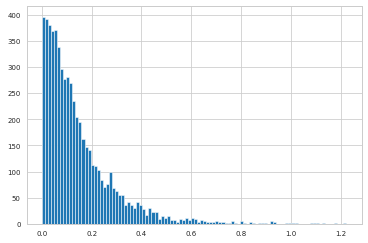

In [19]:
plt.hist(noun_sentence_df_final_reindex_df_filtered.AVM_Error_Indicators_scale_inverse,bins=100)

In [32]:
full_list = noun_sentence_df_final_reindex_df_filtered.index

In [49]:
all_combinations = []
all_combinations_names = []

for i in [1,3,5,7,9,10]:
    print(i)
    temp_list = list(full_list[:int(len(full_list)*i/10.)]) + \
                list(noun_sentence_state_train.columns[51:-3])[len(noun_sentence_df_final_reindex_df_filtered):]
    all_combinations.append(['new_avmValue','cbsa', 'cj_living_area',
                   'AVM_Error_Indicators_0', 'AVM_Error_Indicators_1',
                   'AVM_Error_Indicators_2', 'AVM_Error_Indicators_3',
                   'AVM_Error_Indicators_4', 'AVM_Error_Indicators_5',
                   'AVM_Error_Indicators_6', 'AVM_Error_Indicators_7',
                   'AVM_Error_Indicators_8', 'AVM_Error_Indicators_9',
                   'AVM_Error_Indicators_10', 'AVM_Error_Indicators_11',
                   'AVM_Error_Indicators_scale', 'AVM_Error_Indicators_scale_inverse',
                   'Listing_Error_Indicators_0', 'Listing_Error_Indicators_1',
                   'Listing_Error_Indicators_2', 'Listing_Error_Indicators_3',
                   'Listing_Error_Indicators_4', 'Listing_Error_Indicators_5',
                   'Listing_Error_Indicators_6', 'Listing_Error_Indicators_7',
                   'Listing_Error_Indicators_8', 'Listing_Error_Indicators_9',
                   'Listing_Error_Indicators_10', 'Listing_Error_Indicators_11',
                   'AVM_Error_Indicators_0_max_value',
                   'AVM_Error_Indicators_0_min_value',
                   'AVM_Error_Indicators_0_max_indicator',
                   'AVM_Error_Indicators_0_min_indicator',
                   'AVM_Error_Indicators_0_diff_indicator',
                   'AVM_Error_Indicators_0_diff_value', 'AVM_Error_Indicators_0_mean','avmerror_mean'] +\
                    temp_list)
    all_combinations_names.append('new_avmValue-cbsa-cj_living_area-comments_'+str(i))

1
3
5
7
9
10


In [50]:
all_combinations_names

['new_avmValue-cbsa-cj_living_area-comments_1',
 'new_avmValue-cbsa-cj_living_area-comments_3',
 'new_avmValue-cbsa-cj_living_area-comments_5',
 'new_avmValue-cbsa-cj_living_area-comments_7',
 'new_avmValue-cbsa-cj_living_area-comments_9',
 'new_avmValue-cbsa-cj_living_area-comments_10']

In [51]:
file = 'NEW_AVM_DATA'+state+'.fea'

new_avm_df = pd.read_feather(file)
new_avm_df = new_avm_df.drop(columns=['index','state'])

In [52]:
new_avm_df = new_avm_df.rename(columns={'avmvalue':'new_avmValue', 'avmerror':'new_avmerror'})

In [53]:
len(new_avm_df)

450703

In [54]:
new_avm_df

,listingid,qtr,new_avmValue,new_avmerror
0,220005293,202008.0,519120.957891,-0.331079
1,201184809,201908.0,280979.800818,0.121938
2,236831405,202102.0,299548.162298,0.092278
3,231029170,202011.0,354959.881618,-0.014461
4,234567556,202102.0,382737.269635,-0.026105
...,...,...,...,...
450698,185648594,201811.0,246024.269713,0.035199
450699,218275542,202002.0,266431.127358,-0.332156
450700,227630548,202011.0,290204.899310,-0.001052
450701,227628311,202011.0,290204.899310,-0.001052


In [55]:
len(noun_sentence_state_train)

195636

In [56]:
len(noun_sentence_state_test)

83844

In [57]:
new_avm_df

,listingid,qtr,new_avmValue,new_avmerror
0,220005293,202008.0,519120.957891,-0.331079
1,201184809,201908.0,280979.800818,0.121938
2,236831405,202102.0,299548.162298,0.092278
3,231029170,202011.0,354959.881618,-0.014461
4,234567556,202102.0,382737.269635,-0.026105
...,...,...,...,...
450698,185648594,201811.0,246024.269713,0.035199
450699,218275542,202002.0,266431.127358,-0.332156
450700,227630548,202011.0,290204.899310,-0.001052
450701,227628311,202011.0,290204.899310,-0.001052


In [58]:
noun_sentence_state_train = noun_sentence_state_train.merge(new_avm_df,
                                                         how='left', left_on='listingid', right_on='listingid')

In [59]:
noun_sentence_state_train = noun_sentence_state_train.dropna()

In [60]:
noun_sentence_state_test = noun_sentence_state_test.merge(new_avm_df,
                                                         how='left', left_on='listingid', right_on='listingid')

In [61]:
noun_sentence_state_test = noun_sentence_state_test.dropna()

In [62]:
len(noun_sentence_state_train)

132735

In [63]:
len(noun_sentence_state_test)

56442

In [64]:
noun_sentence_state_test_transdate_train = noun_sentence_state_train.groupby('Transdate').mean()[['new_avmerror']].reset_index()
noun_sentence_state_test_transdate_train = noun_sentence_state_test_transdate_train.rename(columns={"new_avmerror": "avmerror_mean"})

In [65]:
noun_sentence_state_test_transdate_test = noun_sentence_state_test.groupby('Transdate').mean()[['new_avmerror']].reset_index()
noun_sentence_state_test_transdate_test = noun_sentence_state_test_transdate_test.rename(columns={"new_avmerror": "avmerror_mean"})

In [66]:
noun_sentence_state_train = noun_sentence_state_train.merge(noun_sentence_state_test_transdate_train,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [67]:
noun_sentence_state_test = noun_sentence_state_test.merge(noun_sentence_state_test_transdate_test,
                                                         how='left', left_on='Transdate', right_on='Transdate')

In [ ]:
list(noun_sentence_state_train.columns[51:-3])[-1]

In [69]:
from lightgbm import LGBMRegressor

In [70]:
for idd,list_preds in enumerate(all_combinations):
    #print(list(list_preds))
    print(all_combinations_names[idd])
    
    selcted_columns = list_preds
    symptoms_df = noun_sentence_state_train.loc[:,selcted_columns]
    symptoms_df_test = noun_sentence_state_test.loc[:,selcted_columns]
    
    Predictors = symptoms_df.to_numpy()
    X_test = symptoms_df_test.to_numpy()
    X_train = Predictors

    y_train_regressor = noun_sentence_state_train.new_avmerror.values
    y_test_regressor = noun_sentence_state_test.new_avmerror.values
    
    model_regressor = LGBMRegressor(max_depth = 10, n_estimators = 150, num_leaves = 700, colsample_bytree=0.4) 
    model_regressor.fit(X_train, y_train_regressor)
    
    predictions_train_Regressor = model_regressor.predict(X_train)
    predictions_test_Regressor = model_regressor.predict(X_test)

    
    avmValue_test = noun_sentence_state_test['new_avmValue']
    avmValue_train = noun_sentence_state_train['new_avmValue']

    transprice_test = noun_sentence_state_test['Transprice']
    transprice_train = noun_sentence_state_train['Transprice']

    predictions_test_valueR = avmValue_test/(1-predictions_test_Regressor)
    predictions_train_valueR = avmValue_train/(1-predictions_train_Regressor)
    
    
    print('') 
    print('Testing')
    print(np.mean(np.abs(transprice_test-predictions_test_valueR)/\
              (transprice_test)))
    print(np.mean(np.abs(transprice_test - avmValue_test)/\
                  (transprice_test)))

    print('') 
    print('Training') 
    print(np.mean(np.abs(transprice_train-predictions_train_valueR)/\
              (transprice_train)))
    print(np.mean(np.abs(transprice_train - avmValue_train)/\
                  (transprice_train)))   
    
    import joblib
    filename = 'LGBM_regressor_additive_'+state+'_'+str(idd)+'_new_avm_test_number_phrases.sav'
    joblib.dump(model_regressor,filename)
    print(' ')
    

new_avmValue-cbsa-cj_living_area-comments_1

Testing
0.10246916505566805
0.11065699136233385

Training
0.0880209843888363
0.11048163894877737
 
new_avmValue-cbsa-cj_living_area-comments_3

Testing
0.10190475433510587
0.11065699136233385

Training
0.08868314334141449
0.11048163894877737
 
new_avmValue-cbsa-cj_living_area-comments_5

Testing
0.10170599354958963
0.11065699136233385

Training
0.08946787256404588
0.11048163894877737
 
new_avmValue-cbsa-cj_living_area-comments_7

Testing
0.10147005003406873
0.11065699136233385

Training
0.08923747466560622
0.11048163894877737
 
new_avmValue-cbsa-cj_living_area-comments_9

Testing
0.10156385268010379
0.11065699136233385

Training
0.08899094415287763
0.11048163894877737
 
new_avmValue-cbsa-cj_living_area-comments_10

Testing
0.10127956887579156
0.11065699136233385

Training
0.08903182085851624
0.11048163894877737
 
